<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_09/01_baselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baselines
Compare your model to...

In [ ]:
import pandas as pd

df = pd.read_parquet('https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet')

df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-21 07:55:21,2019-12-21 08:00:18,1.0,1.20,1.0,N,148,4,2.0,6.5,2.5,0.5,0.00,0.0,0.3,9.80,2.5
1,1.0,2019-12-08 13:20:45,2019-12-08 13:28:32,1.0,1.10,1.0,N,113,90,1.0,7.0,2.5,0.5,3.00,0.0,0.3,13.30,2.5
2,2.0,2019-12-28 14:41:40,2019-12-28 14:52:29,1.0,1.12,1.0,N,186,137,2.0,8.0,0.0,0.5,0.00,0.0,0.3,11.30,2.5
3,2.0,2019-12-05 23:42:35,2019-12-05 23:59:18,2.0,3.80,1.0,N,230,263,1.0,14.5,0.5,0.5,3.66,0.0,0.3,21.96,2.5
4,1.0,2019-12-13 12:30:25,2019-12-13 12:45:04,2.0,2.10,1.0,N,162,239,1.0,11.5,2.5,0.5,3.00,0.0,0.3,17.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482737,1.0,2019-12-12 15:22:02,2019-12-12 15:25:26,1.0,0.20,1.0,N,140,140,1.0,4.0,0.0,0.5,0.95,0.0,0.3,5.75,0.0
482738,1.0,2019-12-28 18:36:46,2019-12-28 18:44:33,1.0,1.80,1.0,N,263,75,2.0,8.0,2.5,0.5,0.00,0.0,0.3,11.30,2.5
482739,1.0,2019-12-07 19:58:00,2019-12-07 20:17:30,1.0,1.40,1.0,N,246,164,1.0,12.5,2.5,0.5,3.15,0.0,0.3,18.95,2.5
482740,2.0,2019-12-14 12:27:36,2019-12-14 12:43:30,1.0,5.58,1.0,N,170,88,1.0,18.5,0.0,0.5,4.36,0.0,0.3,26.16,2.5


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.165798,0.025826,0.009225,-0.006963,-0.002515,-0.012707,-0.001725,-0.858735,-0.028355,0.021642,0.010144,-0.039408,-0.001597,-0.009748
passenger_count,0.165798,1.000000,0.019496,0.000271,-0.006724,-0.004947,0.016564,-0.000294,-0.135692,0.002063,0.000780,0.012475,0.003783,-0.000227,0.013716
trip_distance,0.025826,0.019496,1.000000,0.144107,-0.094794,-0.107132,-0.020566,0.017491,0.001632,-0.085268,0.506991,0.615388,0.018388,0.021689,-0.210402
RatecodeID,0.009225,0.000271,0.144107,1.000000,-0.008881,0.002503,0.006139,0.004868,-0.022093,-0.181959,0.133305,0.155296,-0.039509,0.005854,-0.094704
PULocationID,-0.006963,-0.006724,-0.094794,-0.008881,1.000000,0.107039,-0.028173,-0.000217,0.015927,0.010784,-0.027828,-0.049324,0.002824,-0.000370,0.127982
DOLocationID,-0.002515,-0.004947,-0.107132,0.002503,0.107039,1.000000,-0.029818,-0.000392,0.014882,0.028633,-0.034075,-0.065728,-0.000009,-0.000616,0.129009
payment_type,-0.012707,0.016564,-0.020566,0.006139,-0.028173,-0.029818,1.000000,0.006944,-0.021476,-0.178163,-0.484442,-0.033897,-0.221938,0.004156,-0.175131
fare_amount,-0.001725,-0.000294,0.017491,0.004868,-0.000217,-0.000392,0.006944,1.000000,0.001580,-0.006006,0.010816,0.012652,-0.010373,0.999976,-0.004353
extra,-0.858735,-0.135692,0.001632,-0.022093,0.015927,0.014882,-0.021476,0.001580,1.000000,0.063720,0.002841,0.002643,0.064156,0.002209,0.147109
mta_tax,-0.028355,0.002063,-0.085268,-0.181959,0.010784,0.028633,-0.178163,-0.006006,0.063720,1.000000,-0.060702,-0.168105,0.744811,-0.006107,0.409854


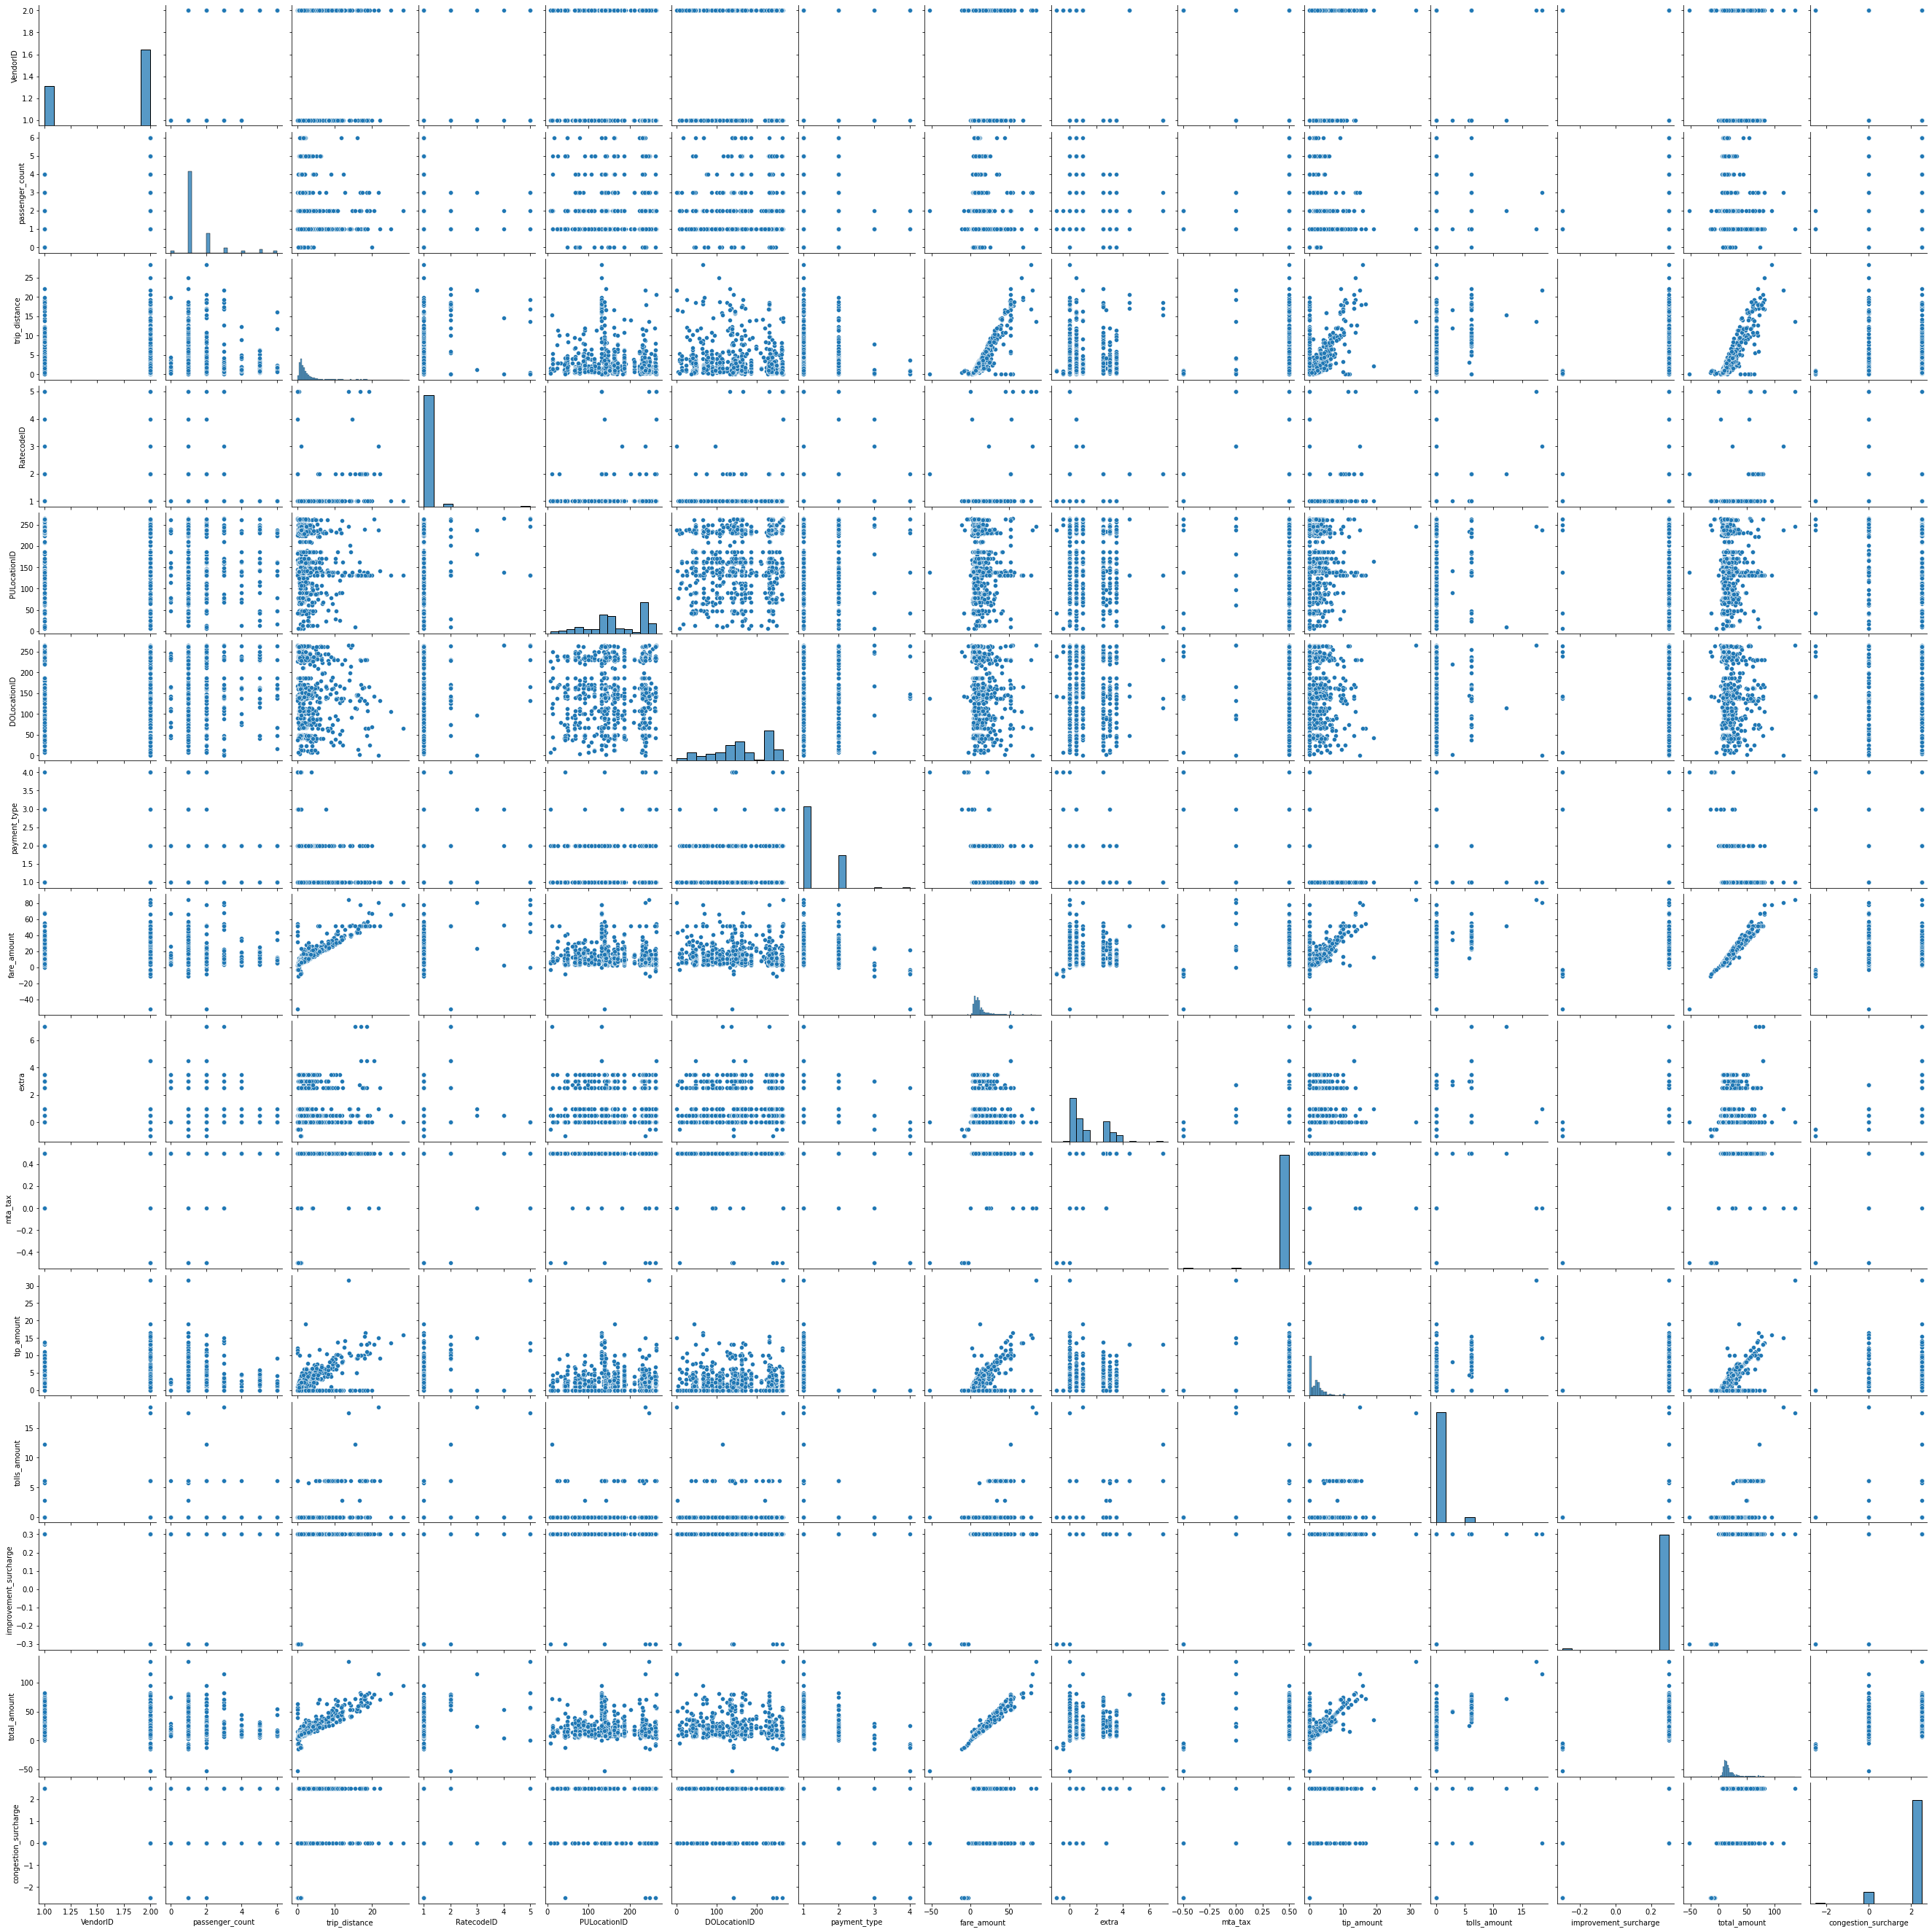

In [ ]:
import seaborn as sns

sns.pairplot(df.sample(1000))

Too much to look at... let's foucs...

We can include `fare_amount` because we're going to use this data to predict `tip_amount` for Uber... If we were predicting this for Yellow Cab, `fare_amount` could not be included because it is not known at the beinning of the ride (when our data is collected), but Uber gives you estimates for how much the `fare_amount` will be...

The data we are using is [Yellow Cab from December 2019](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)...


In [ ]:
# data we know at the start of the Uber trip
X_columns = ['trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']

By Taxi zones (`PULocationID` and `DOLocationID`) I mean...

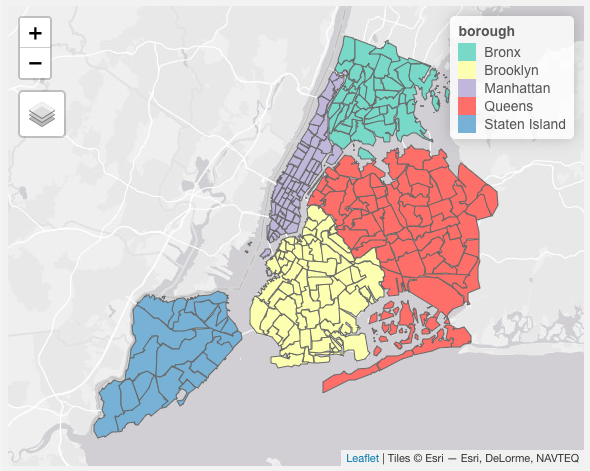

We don't know tip amount... so I want to predict it... Let's say I'm a Uber driver...

In [ ]:
X = df[X_columns]
y = df.tip_amount

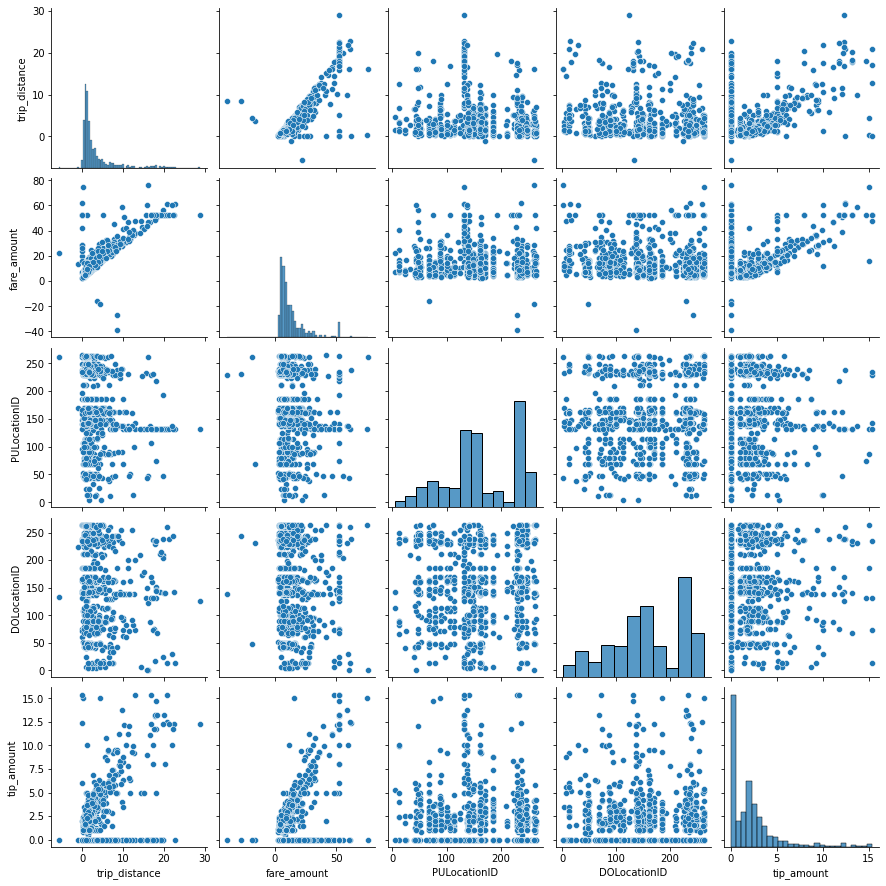

In [ ]:
sns.pairplot(df[X_columns + ['tip_amount']].sample(1000))

In [ ]:
X.describe()

,trip_distance,fare_amount,PULocationID,DOLocationID
count,482742.000000,482742.000000,482742.000000,482742.000000
mean,2.977807,14.358827,163.502449,161.722570
std,3.941160,573.620806,66.172609,70.222873
min,-30.100000,-180.000000,1.000000,1.000000
25%,0.960000,6.500000,125.000000,112.000000
50%,1.600000,9.500000,162.000000,162.000000
75%,3.020000,15.500000,233.000000,234.000000
max,93.740000,398468.380000,265.000000,265.000000


In [ ]:
X.trip_distance.value_counts()

 0.90     9004
 0.80     8756
 1.00     8586
 0.70     8390
 1.10     8199
          ... 
 34.46       1
 23.32       1
-5.13        1
-8.61        1
 42.50       1
Name: trip_distance, Length: 3192, dtype: int64

Too many numbers... but I already see some I don't like...

In [ ]:
X.trip_distance.astype('int').value_counts()

 1     161129
 0     126001
 2      72338
 3      34188
 4      18453
        ...  
 59         1
-28         1
 62         1
 64         1
 68         1
Name: trip_distance, Length: 98, dtype: int64

In [ ]:
X.trip_distance.loc[X.trip_distance > 100]

Series([], Name: trip_distance, dtype: float64)

In [ ]:
X.trip_distance.loc[X.trip_distance < 0]

664      -29.03
11234    -15.15
15229     -8.30
17506    -20.37
18494     -1.40
          ...  
472452    -7.34
477215    -0.99
479229   -18.53
479247   -11.47
481759    -2.15
Name: trip_distance, Length: 219, dtype: float64

In [ ]:
len(X.trip_distance.loc[X.trip_distance < 0])

219

In [ ]:
len(X)

482742

Take out the negatives...  (outliers)

Note: we'll do this later

In [ ]:
X['fare_amount'].value_counts()

6.00      22827
6.50      22705
5.50      22131
7.00      21935
7.50      21117
          ...  
17.26         1
43.40         1
21.44         1
114.50        1
46.22         1
Name: fare_amount, Length: 2053, dtype: int64

In [ ]:
X['fare_amount'].loc[X['fare_amount'] < 0]

376      -37.5
639      -18.5
649      -25.5
651       -6.0
750       -5.0
          ... 
480766    -3.0
480962    -8.5
481372    -4.5
481941    -3.0
482679   -47.0
Name: fare_amount, Length: 1438, dtype: float64

In [ ]:
len(X['fare_amount'].loc[X['fare_amount'] < 0])

1438

In [ ]:
import numpy as np

np.mean(X[['trip_distance', 'fare_amount']])

trip_distance     2.977807
fare_amount      14.358827
dtype: float64

I don't know where the negative `fare_amount` values are coming from, or what they mean... If I could figure it out, that'd be cool, but if I can't then I shouldn't use data I don't understand...

Let's do a simple scatter plot to see our outliers...

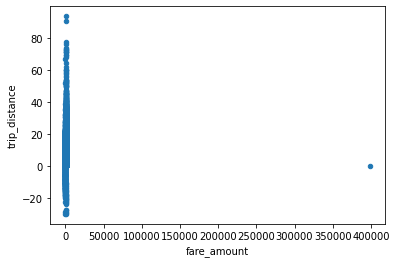

In [ ]:
X.plot('fare_amount', 'trip_distance', kind='scatter')

Wow, I missed a super expensive taxi ride...

In [ ]:
X.loc[X.fare_amount > 1000]

,trip_distance,fare_amount,PULocationID,DOLocationID
15955,0.0,398468.38,236,237


That doens't make sense.. but ok.. (will drop later)

In [ ]:
X.loc[X.fare_amount < 0]

,trip_distance,fare_amount,PULocationID,DOLocationID
376,13.84,-37.5,132,223
639,4.59,-18.5,261,230
649,5.19,-25.5,261,230
651,1.07,-6.0,162,163
750,0.90,-5.0,263,75
...,...,...,...,...
480766,0.02,-3.0,68,68
480962,0.83,-8.5,43,142
481372,0.01,-4.5,161,161
481941,0.12,-3.0,186,186


In [ ]:
X.loc[X.fare_amount < 0].trip_distance.value_counts()

0.00     159
0.01      55
0.02      29
0.03      24
0.04      19
        ... 
19.23      1
9.59       1
17.42      1
2.80       1
10.48      1
Name: trip_distance, Length: 411, dtype: int64

In [ ]:
np.min(X.loc[X.fare_amount < 0].trip_distance.values)

0.0

Possible explain for negative `fare_amount`: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/discussion/62293

But we're still going to drop them...

In [ ]:
len(X)

482742

In [ ]:
X = X.loc[(X['fare_amount'] > 0) & (X['fare_amount'] < 1000) & (X['trip_distance'] > 0)]
len(X)

476346

In [ ]:
482742 - 476346

6396

I've dropped 6396 instances where `trip_distance` and `fare_amount` didn't make sense (were negative)...

In [ ]:
# Note: our index is missing values (index is the untitled column to the left)
X.sample(3)

,trip_distance,fare_amount,PULocationID,DOLocationID
178216,2.00,11.5,141,239
327088,2.66,15.0,236,230
126714,9.20,30.5,261,36


In [ ]:
# drop the same rows (by index) in y
y.iloc[X.index]

0         0.00
1         3.00
2         0.00
3         3.66
4         3.00
          ... 
482737    0.95
482738    0.00
482739    3.15
482740    4.36
482741    1.00
Name: tip_amount, Length: 476346, dtype: float64

In [ ]:
y = y.iloc[X.index]

In [ ]:
len(X), len(y)

(476346, 476346)

In [ ]:
# make sure there's no missing values
np.sum(X.isna())

trip_distance    0
fare_amount      0
PULocationID     0
DOLocationID     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.tail(2)

,trip_distance,fare_amount,PULocationID,DOLocationID
263326,2.20,10.5,114,13
290575,19.29,54.0,230,139


In [ ]:
y_test.tail(2)

321650    2.06
87127     0.00
Name: tip_amount, dtype: float64

In [ ]:
len(X_train), len(y_test)

(381076, 95270)

### Make a Model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# train the model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
len(lr.predict(X_test))

95270

In [ ]:
lr.predict(X_test)

array([0.89079876, 1.66186655, 3.03295073, ..., 0.92670468, 1.30077824,
       2.4096964 ])

In [ ]:
np.mean(y_train)

2.244874670669327

In [ ]:
# how many predictions does my model need to make?
len(y_test)

95270

A baseline model will not consider `X` variables...

In [ ]:
y_train

30219     2.06
223873    2.00
303743    1.75
359600    1.00
214940    0.00
          ... 
62131     5.00
470724    0.00
98605     4.69
263326    0.00
290575    0.00
Name: tip_amount, Length: 381076, dtype: float64

In [ ]:
# let's predict something simple... like the average
np.mean(y_train)

2.244874670669327

In [ ]:
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = np.mean(y_train)  # what value to predict?

baseline_model(n_predictions, baseline_value)

0        2.244875
1        2.244875
2        2.244875
3        2.244875
4        2.244875
           ...   
95265    2.244875
95266    2.244875
95267    2.244875
95268    2.244875
95269    2.244875
Length: 95270, dtype: float64

#### Baseline vs Our Model

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
baseline_preds = baseline_model(n_predictions, baseline_value)

# score baseline model...
mean_squared_error(y_test, baseline_preds)

7.452960413043365

In [ ]:
lr = LinearRegression()

# train the model with training data
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

# score our model...
mean_squared_error(y_test, preds)

5.098367211521621

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
baseline_preds = baseline_model(n_predictions, baseline_value)

# score baseline model...
r2_score(y_test, baseline_preds)  # -0.00000002947233390193446

-2.4947233390193446e-08

Note: `-` in r2 means you shouldn't be using it... 

In [ ]:
lr = LinearRegression()

# train the model with training data
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

# score our model...
r2_score(y_test, preds)

0.3159272213778076

## And for classification...

In [ ]:
df = pd.read_csv('https://github.com/gumdropsteve/datasets/raw/master/dog_or_horse.csv')

# changing dataframe so there's not the same number of each class (you shouldn't do this)
df = df.sample(191)

df

,height,weight,target,type
70,27.0,46.0,0.0,dog
198,56.0,89.0,1.0,horse
71,29.0,82.0,0.0,dog
36,25.0,81.0,0.0,dog
22,32.0,84.0,0.0,dog
...,...,...,...,...
155,83.0,175.0,1.0,horse
171,68.0,129.0,1.0,horse
103,56.0,111.0,1.0,horse
45,25.0,60.0,0.0,dog


In [ ]:
X = df.drop(['type', 'target'], axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#### Define Baseline Classification Model

In [ ]:
y_train.value_counts(normalize=True)

0.0    0.519737
1.0    0.480263
Name: target, dtype: float64

In [ ]:
y_train.value_counts()  # 0 = dog, 1 = horse

0.0    79
1.0    73
Name: target, dtype: int64

In [ ]:
y_train.value_counts().index

Float64Index([0.0, 1.0], dtype='float64')

In [ ]:
y_train.value_counts().index[0]  # give me my most common class

0.0

My baseline should predict the most common class...

In [ ]:
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class)

baseline_model(n_predictions, baseline_value)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
dtype: float64

Define our model...

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

lr.predict(X_test)

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1.])

#### Baseline classification vs Our model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class)

baseline_preds = baseline_model(n_predictions, baseline_value)

accuracy_score(y_test, baseline_preds)

0.358974358974359

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

preds = lr.predict(X_test)

accuracy_score(y_test, preds)

0.9743589743589743

Our model has better accuracy than baseline model. That's good!